In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("Before:\n",x_train.shape)
print(x_test.shape,'\n\n')

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale = 1.0, size = (60000, 28, 28, 1))
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale = 1.0, size = (10000, 28, 28, 1))

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
Before:
 (60000, 28, 28)
(10000, 28, 28) 




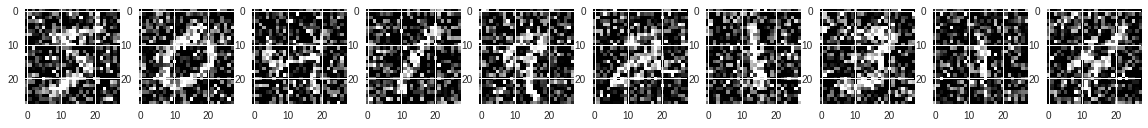

In [0]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(x_train_noisy[i].reshape(28,28), cmap="gray")

In [0]:
from keras import models, layers

input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2,2), padding = "same")(x)
x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(x)
encoded = layers.MaxPooling2D((2,2), padding="same")(x)

x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(encoded)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(32, (3,3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2,2))(x)
decoded = layers.Conv2D(1,(3,3), activation="sigmoid", padding="same")(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(
  optimizer = "adadelta",
  loss = "binary_crossentropy"
)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0         
__________

In [0]:
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 143us/step - loss: 0.0954 - val_loss: 0.0952
Epoch 2/50
60000/60000 [==============================] - 8s 133us/step - loss: 0.0954 - val_loss: 0.0951
Epoch 3/50
60000/60000 [==============================] - 8s 130us/step - loss: 0.0953 - val_loss: 0.0948
Epoch 4/50
60000/60000 [==============================] - 8s 131us/step - loss: 0.0953 - val_loss: 0.0958
Epoch 5/50
60000/60000 [==============================] - 8s 132us/step - loss: 0.0952 - val_loss: 0.0951
Epoch 6/50
60000/60000 [==============================] - 8s 131us/step - loss: 0.0952 - val_loss: 0.0956
Epoch 7/50
60000/60000 [==============================] - 8s 132us/step - loss: 0.0951 - val_loss: 0.0948
Epoch 8/50
60000/60000 [==============================] - 8s 131us/step - loss: 0.0951 - val_loss: 0.0944
Epoch 9/50
60000/60000 [==============================] - 8s 131us/step - loss: 0.0951 - val_loss: 0.0

(10000, 28, 28, 1)


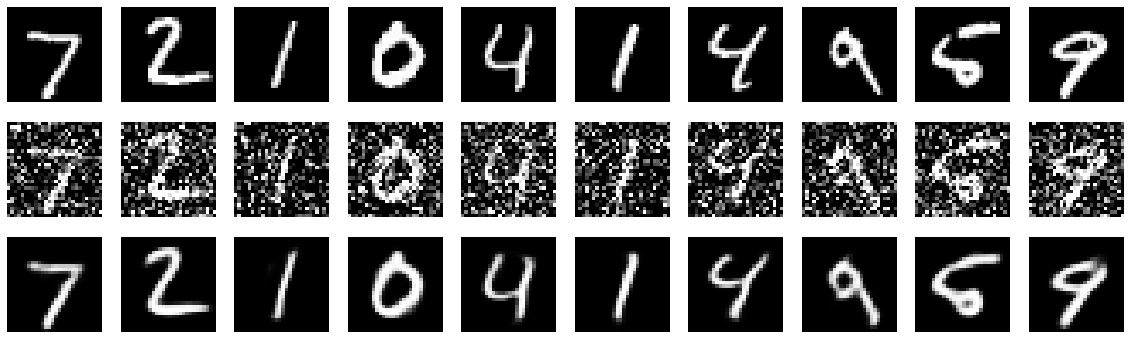

In [0]:
decoded_imgs = autoencoder.predict(x_test_noisy) 

print(decoded_imgs.shape)

n = 10
plt.figure(figsize=(20,6))

for i in range(n):
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape((28,28)), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(x_test_noisy[i].reshape((28,28)), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i+1+2*n)
    plt.imshow(decoded_imgs[i].reshape((28,28)), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()
plt.close()